# Basic Overview

This guide will provide a basic overview of the `dataclocklib` library, including how to create charts and utilise the utility functions. The data and Jupyter Notebook used in this guide is available at the library GitHub repository:

1. [Data](https://github.com/andyrids/dataclocklib/blob/main/tests/data/traffic_data.parquet.gzip)
2. [Notebook](https://github.com/andyrids/dataclocklib/blob/main/docs/source/tutorial.ipynb)

Here we install dataclock library and download the data ready for visualisation. The data has already been cleaned and preprocessed in a way that can be used by the `dataclocklib.charts.dataclock` function.

In [1]:
%pip install -U dataclocklib

/home/andyr/projects/dataclocklib/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
data = pd.read_parquet(
    "https://raw.githubusercontent.com/andyrids/dataclocklib/main/tests/data/traffic_data.parquet.gzip"
)

Data clocks visually summarise temporal data in two dimensions, revealing seasonal or cyclical patterns and trends over time. A data clock is a circular chart that divides a larger unit of time into rings and subdivides it by a smaller unit of time into wedges, creating a set of temporal bins.

We import the dataclock function like below:

In [4]:
from dataclocklib.charts import dataclock

Everything is documented, including public modules and docstrings, which can be printed using the `help` function. Full API documentation is also available on the [documentation site](https://andyrids.github.io/dataclocklib/).

In [5]:
help(dataclock)

Help on function dataclock in module dataclocklib.charts:

dataclock(
    data: 'DataFrame',
    date_column: 'str',
    agg_column: 'Optional[str]' = None,
    agg: 'Aggregation' = 'count',
    mode: 'Mode' = 'DAY_HOUR',
    cmap_name: 'CmapNames' = 'RdYlGn_r',
    default_text: 'bool' = True,
    *,
    chart_title: 'Optional[str]' = None,
    chart_subtitle: 'Optional[str]' = None,
    chart_period: 'Optional[str]' = None,
    chart_source: 'Optional[str]' = None,
    **fig_kw
) -> 'tuple[DataFrame, Figure, Axes]'
    Create a data clock chart from a pandas DataFrame.

    Data clocks visually summarise temporal data in two dimensions,
    revealing seasonal or cyclical patterns and trends over time.
    A data clock is a circular chart that divides a larger unit of
    time into rings and subdivides it by a smaller unit of time into
    wedges, creating a set of temporal bins.

    Args:
        data (DataFrame): DataFrame containing data to visualise.
        date_column (str): Na

The `dataclock` chart function expects:

1. `Pandas` DataFrame (data).
2. Name of the datetime formatted column (date_column).
3. Name of the column to aggregate (agg_column).
    - Only required if aggregation function is not 'count'.
4. Name of the aggregation function (agg).
    - Functions; 'count', 'mean', 'median', 'mode' & 'sum'.
    - Default is 'count'.
5. Chart mode, representing how to divide the temporal elements of the data (mode).
    - Modes; 'YEAR_MONTH', 'YEAR_WEEK', 'WEEK_DAY', 'DOW_HOUR' & 'DAY_HOUR'.
    - The first part of the mode refers to rings and the second refers to the wedges.
    - Default mode is 'DAY_HOUR'.

**NOTE**: Be mindful of the temporal range in your data when choosing a mode. If you have 5+ years of data and choose to represent each day of the year as a ring, with the hours of the day as wedges ('DAY_HOUR') then the chart will likely not generate or be too crowded. In this instance, 'DOW_HOUR' mode would be better as it can visualise that amount of data, by grouping it by days Monday - Sunday. You could also split your data down and apply the function on the grouped data.

Below we create a simple chart from the data, but we prevent any default column generation, with the `default_text=False`. We are visualising the data by day of the week (Monday - Sunday) as rings and by hour of day as wedges.

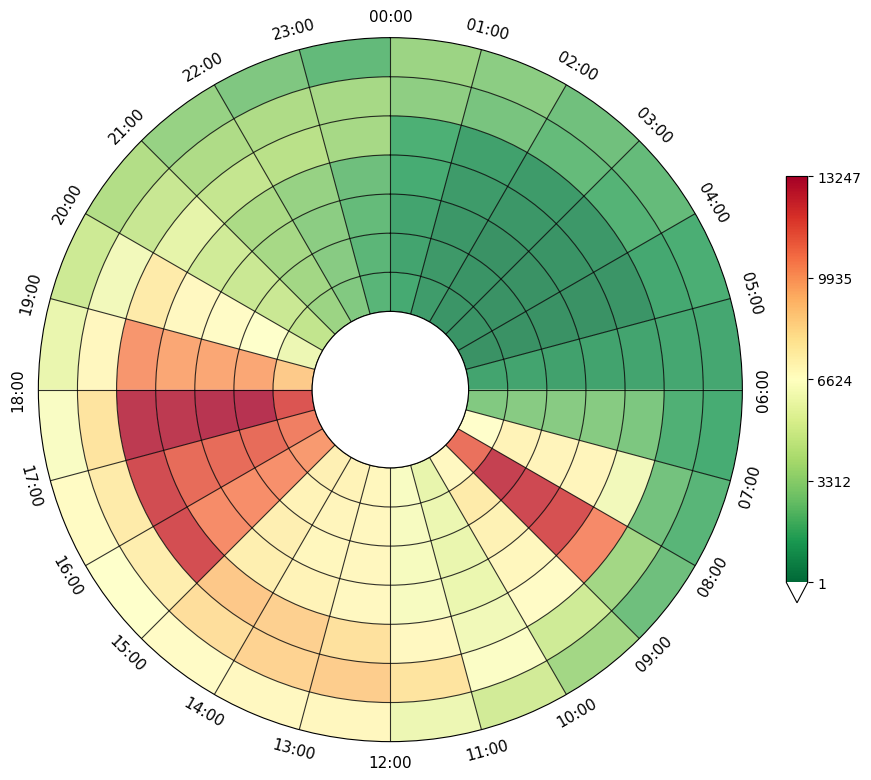

In [6]:
chart_data, fig, ax = dataclock(
    data=data,
    date_column="Date_Time",
    mode="DOW_HOUR",
    default_text=False
)

We can allow the function to generate some default text for the title and subtitle text areas.

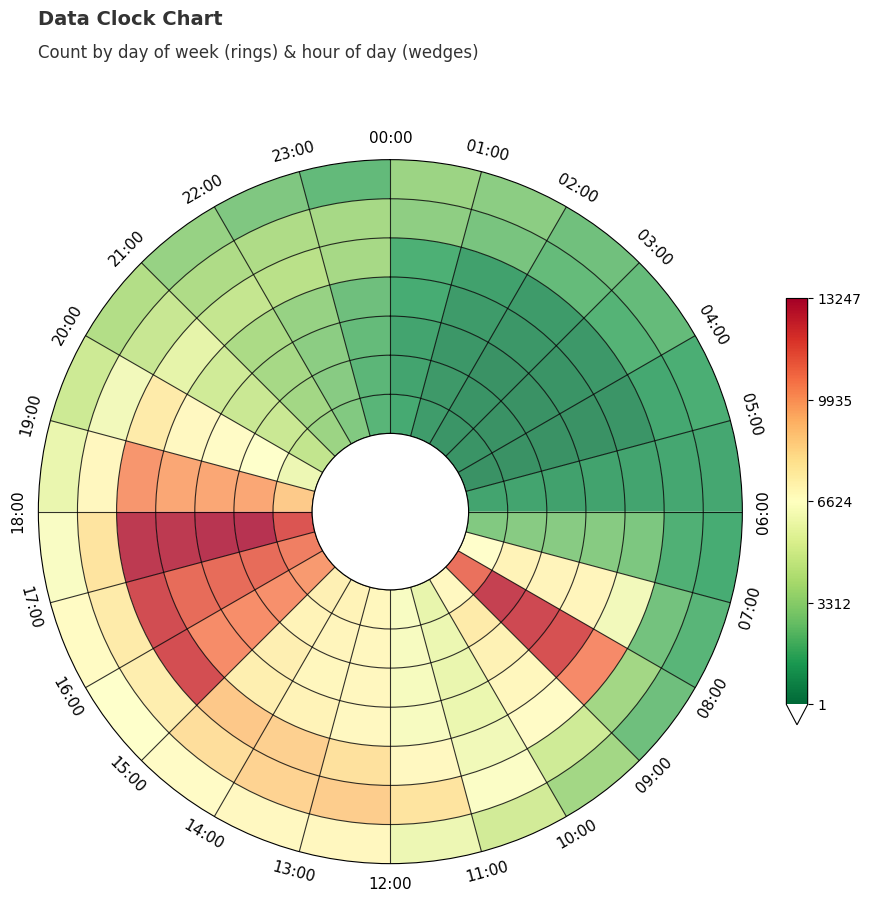

In [7]:
chart_data, fig, ax = dataclock(
    data=data,
    date_column="Date_Time",
    mode="DOW_HOUR",
    default_text=True
)

Next we will add our own title, subtitle and a third text element, which can be used to state the reporting period of the data. You could also use this space to add any other detail. We also make use of the `chart_source` parameter, which can be used to annotate the data source at the bottom of the chart. All of these text elements are dynamically spaced as the chart figure size grows and the number of rings change.

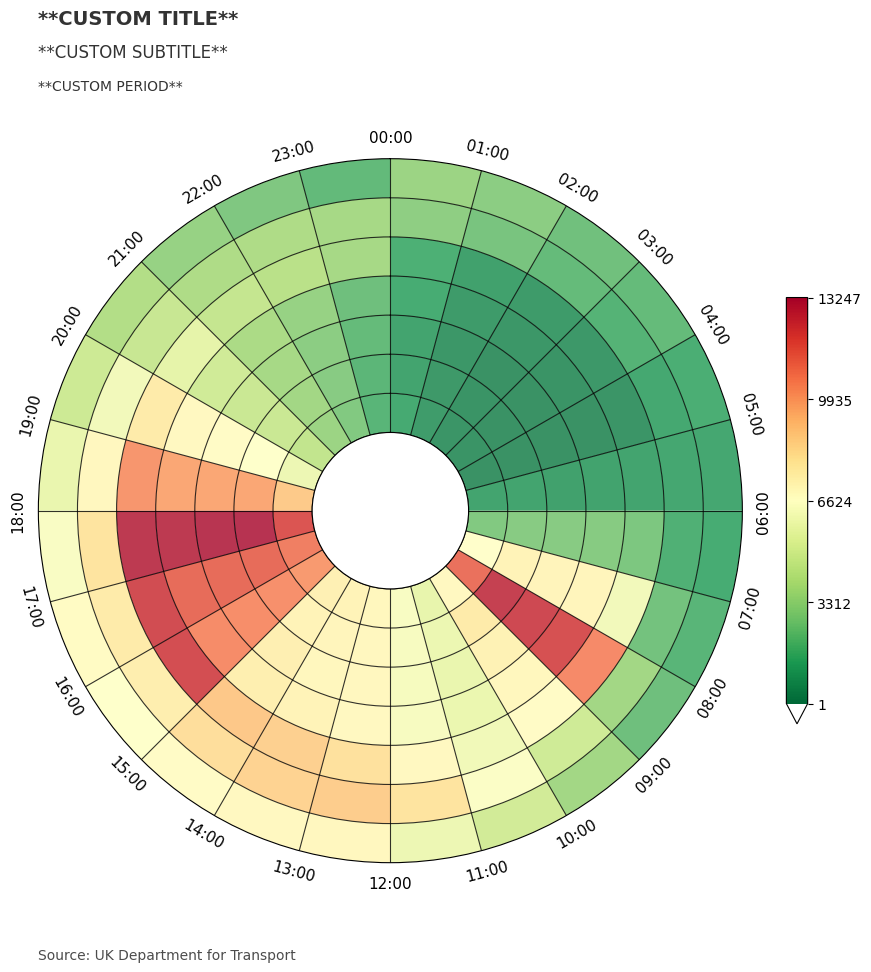

In [8]:
chart_data, fig, ax = dataclock(
    data=data,
    date_column="Date_Time",
    mode="DOW_HOUR",
    default_text=True,
    chart_title="**CUSTOM TITLE**",
    chart_subtitle="**CUSTOM SUBTITLE**",
    chart_period="**CUSTOM PERIOD**",
    chart_source="Source: UK Department for Transport"
)

In the code below, all default titles have been removed (`default_text=False`) and with the Axes (ax) object, we manually set a chart title, adding an extra .1 to the y positioning, placing the title above the chart polar axis labels.

We also have access to the Figure object (fig), allowing for adjustment of the figure size. The figure size is automatically calculated by the `dataclocklib.utility.calculate_figure_dimensions` function based on the total number of individual wedges in each chart (minimum capped at [10,10]).

**NOTE**: Data clock charts work best with a square figure size, which must scale with the number of rings in the data when using different modes.

We have also adjusted the `cmap_name` parameter value used to display the graduated colors. This parameter refers to matplotlib colormap names.

In [9]:
from dataclocklib.utility import calculate_figure_dimensions

# 'DOW_HOUR' mode creates 24 wedges for each of the 7 rings (Monday - Sunday) - 168 wedges
calculate_figure_dimensions(chart_data["wedge"].size)

(11.0, 11.0)

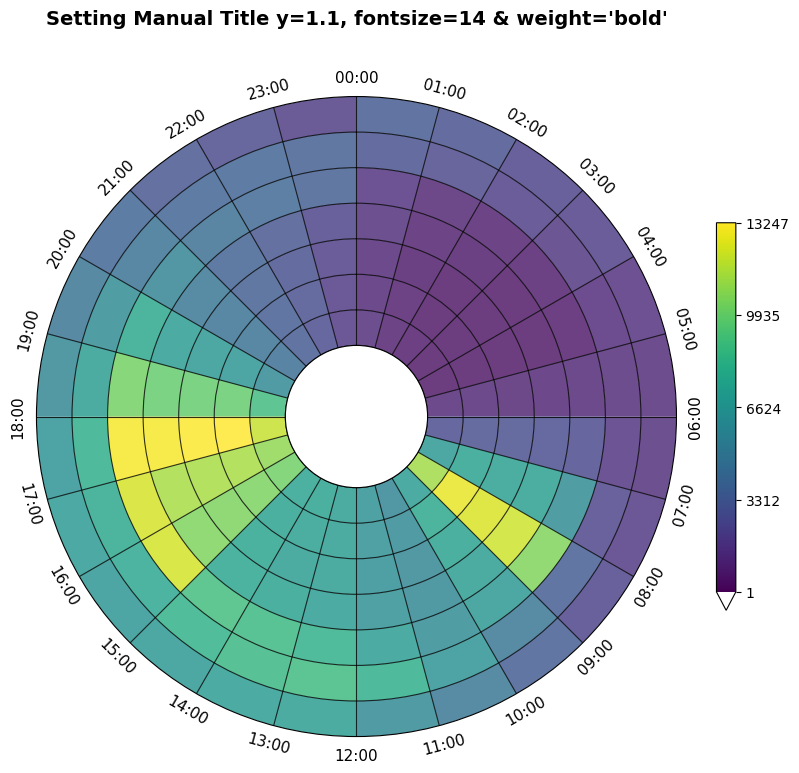

In [10]:
chart_data, fig, ax = dataclock(
    data=data,
    date_column="Date_Time",
    mode="DOW_HOUR",
    cmap_name="viridis",
    default_text=False,
)

# set a custom title outside of dataclocklib API
ax.set_title(
    "Setting Manual Title y=1.1, fontsize=14 & weight='bold'",
    fontdict={"fontsize": 14, "weight": "bold"}, 
    y=1.1
)

# set the figure size to (10,10)
fig.set_size_inches((10,10))

Below we generate a large chart with 'WEEK_DAY' mode, dividing traffic accident data for a full year into 52 rings for weeks of the year and 7 wedges for days of the week. As we chose an aggregation function 'sum', we also needed to specify a numeric column for aggregation. Here we chose a column representing the number of casualties in each accident (`agg_column="Number_of_Casualties"`).

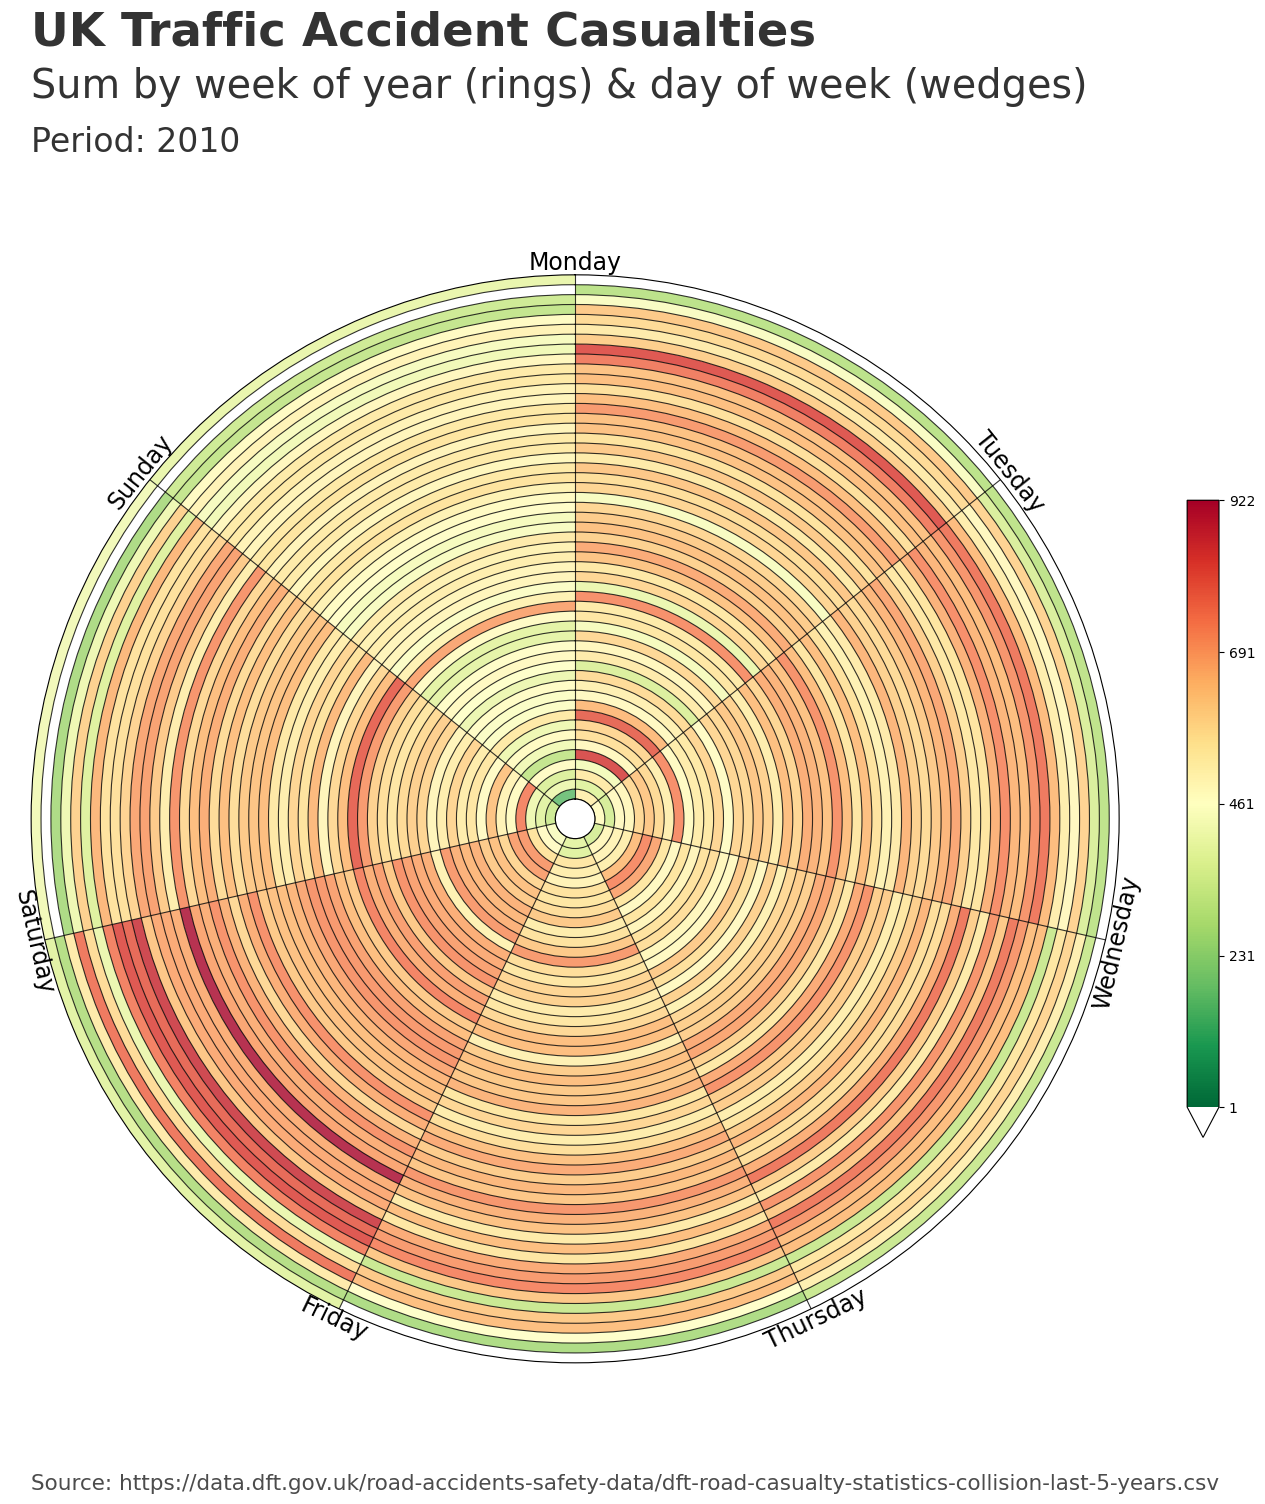

In [11]:
chart_data, fig, ax = dataclock(
    data=data.query("Date_Time.dt.year.eq(2010)"),
    date_column="Date_Time",
    agg_column="Number_of_Casualties",
    agg="sum",
    mode="WEEK_DAY",
    cmap_name="RdYlGn_r",
    default_text=True,
    chart_title="UK Traffic Accident Casualties",
    chart_subtitle=None,
    chart_period="Period: 2010",
    chart_source="Source: https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-last-5-years.csv",
)

The `dataclock` function scales the text size and spacing in reference to the figure size, when using the `chart_title`, `chart_subtitle`, `chart_period` and `chart_source` parameters. The custom polar axis labels are dynamically spaced and scaled based on the number of rings.

We can check the figure dimensions and interface with any matplotlib API properties through the returned Axes & Figure objects.

In [12]:
fig.get_size_inches()

array([17., 17.])

This corresponds with the automatically calculated figure size within the `dataclock` function.

In [13]:
calculate_figure_dimensions(chart_data["wedge"].size)

(17.0, 17.0)

We can view the data that was aggregated and generated from our input `data` DataFrame, by looking at the first returned value. In these examples, this data is reference by the `chart_data` variable.

In [14]:
chart_data["ring"].nunique()

53

For the 'WEEK_DAY' mode and the relevant aggregations, the library uses the ISO date system. For this mode, the possible extra week (53) is not modified, in order to maintain the timing of events.

In the ISO week date system, weeks are numbered from 1 to 52 (or sometimes 53), with each week starting on Monday. A year can have 53 weeks when:

- The year starts on a Thursday
- The year starts on a Wednesday in a leap year

2010 saw its last week stretch into 2011, creating a 'week 53'. January 1 2010, fell on a Friday - causing the last few days of December 2010 to end up in week 53.

When viewing the `chart_data`, we can see the different representations of the rings and wedges. For the 'WEEK_DAY' mode, the rings are created from the `date_column` year and week number and the wedges are formed from the days of the week.

In [15]:
chart_data

,ring,wedge,sum
0,201001,Monday,516
1,201001,Tuesday,477
2,201001,Wednesday,349
3,201001,Thursday,384
4,201001,Friday,441
...,...,...,...
366,201053,Wednesday,0
367,201053,Thursday,0
368,201053,Friday,380
369,201053,Saturday,425


The ring and wedge column creation is handled by the `dataclocklib.utility.assign_ring_wedge_columns` function.

In [18]:
from dataclocklib.utility import assign_ring_wedge_columns

In [19]:
help(assign_ring_wedge_columns)

Help on function assign_ring_wedge_columns in module dataclocklib.utility:

assign_ring_wedge_columns(
    data: pandas.core.frame.DataFrame,
    date_column: str,
    mode: Literal['YEAR_MONTH', 'YEAR_WEEK', 'WEEK_DAY', 'DOW_HOUR', 'DAY_HOUR']
) -> pandas.core.frame.DataFrame
    Assign ring & wedge columns to a DataFrame based on mode.

    The mode value is mapped to a predetermined division of a larger unit of
    time into rings, which are then subdivided by a smaller unit of time into
    wedges, creating a set of temporal bins. These bins are assigned as 'ring'
    and 'wedge' columns.

    Args:
        data (DataFrame): DataFrame containing data to visualise.
        date_column (str): Name of DataFrame datetime64 column.
        mode (Mode, optional): A mode key representing the
            temporal bins used in the chart; 'YEAR_MONTH',
            'YEAR_WEEK', 'WEEK_DAY', 'DOW_HOUR' & 'DAY_HOUR'.

    Returns:
        A DataFrame with 'ring' & 'wedge' columns assigned.



These rings and wedges could also be used to group and visualise the data in other formats, such as a line chart. In 'DOW_HOUR' mode, each unique ring could be plotted as a line, with the aggregation represented on the y-axis and the hours of the day on the x-axis.

The line chart is a work in progress and is included in `dataclocklib` as they can be used to identify temporal patterns that might be better visualised by a data clock chart. As mentioned above, they also lend themselves to easily utilising the library's method of creating temporal bins.

In [22]:
from dataclocklib.charts import line_chart

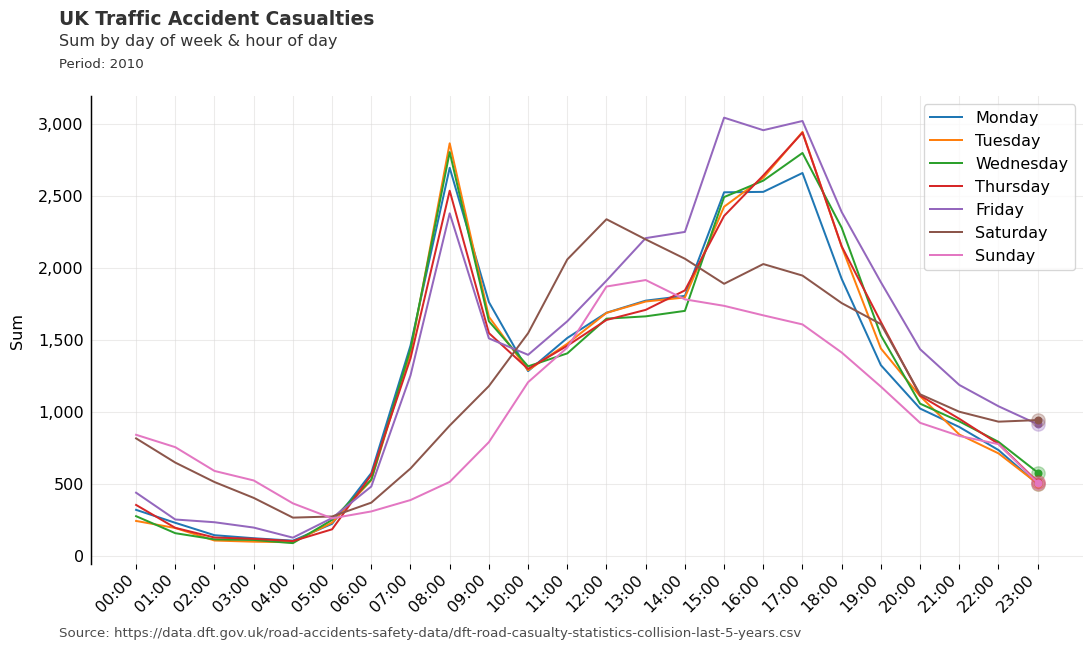

In [23]:
chart_data, fig, ax = line_chart(
    data=data.query("Date_Time.dt.year.eq(2010)"),
    date_column="Date_Time",
    agg_column="Number_of_Casualties",
    agg="sum",
    mode="DOW_HOUR",
    cmap_name="RdYlGn_r",
    default_text=True,
    chart_title="UK Traffic Accident Casualties",
    chart_subtitle=None,
    chart_period="Period: 2010",
    chart_source="Source: https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-last-5-years.csv",
)